# Fitting Code

Fit data from predator-prey spreadsheet, with error calculation for all predator species.



## Spreadsheet functions
Define functions for extracting information from spreadsheets.

In [1]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# These libraries allow us to read and write excel spreadsheets
import ipysheet as xl
import openpyxl
# 
def findCellString(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target string, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellString, "alphabet"):
        findCellString.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                   "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                   "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                   "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                   "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                   "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                   "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                   "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellString.alphabet: 
            cell = "{}{}".format(col, row)
            if sheet[cell].value == target:
                targetCell.append(cell)
    return targetCell
# 
def findCellValue(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target value, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellValue, "alphabet"):
        findCellValue.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                  "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                  "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                  "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                  "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                  "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                  "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                  "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
        findCellValue.tol = 1E-12
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellValue.alphabet: 
            cell = "{}{}".format(col, row)
            try:
                val = float(sheet[cell].value)
                if np.abs(float(sheet[cell].value) - target) < findCellValue.tol:
                    targetCell.append(cell)
            except:
                continue
    return targetCell
#
def cellInds(cell):
    '''
    Given the row and column of a cell in an excel spreadsheet, return its indices.
    Only works for columns up to BZ!
    '''
    if not hasattr(cellInds, "alphabet"):
        cellInds.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                             "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                             "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                             "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                             "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                             "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                             "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                             "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    number = ''
    for s in cell:
        if s.isdigit():
            number += s
    letters = ''
    for s in cell:
        if s.isalpha():
            letters += s
#
    try:
        col = cellInds.alphabet.index(letters) + 1
        row = int(number)
    except:
        col = -1
        row = -1
    return row, col
# 
# Create list of column values
def colList(sheet, col, minRow, maxRow):
    '''
    Given the sheet name in an excel spreadsheet, the required column, return a list  of all the values
    in the column between the minimum and maximum row numbers.
    '''
    colVals = []
    for row in range(minRow, maxRow):
        colVals.append(sheet.cell(row, col).value) 
    #
    return colVals
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:22.095298
 
Date and time 2020-04-29 16:25:23.661531
Time since last check is 0:00:01.566233


## Load spread sheet

Load spread sheet and test spreadsheet functions.

In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import os
import pandas as pd
import numpy as np
#
# Open Predator-Prey (PP) spreadsheet (data_only = True means values in cells read, not formulae)
PPbook = openpyxl.load_workbook('Predator-Prey-DB.xlsx', data_only = True)
PPnames = PPbook.sheetnames
print("Predator-Prey sheet names are:\n",PPnames)
PPsheet = PPbook['Land']
print("Active is",PPsheet)
#
print(" ")
print("Test findCellString")
findString = 'African Predators vs Prey (>5kg) Biomass'
print("findCellString(PPsheet, '" + findString +"') =", findCellString(PPsheet, findString))
print(" ")
print("Test findCellValue")
findValue = 10.69
print("findCellValue(PPsheet, " + str(findValue) +") =", findCellValue(PPsheet, findValue))
print(" ")
print("Test cellInds")
findCell = 'AA137'
print("cellInds(",findCell,") =", cellInds(findCell))
findCell = 'AA7'
print("cellInds(",findCell,") =", cellInds(findCell))
row, col = cellInds(findCell)
print("PPsheet(",row,",",col,").value =",PPsheet.cell(row, col).value)
print(" ")
print("Test colList")
column = 30 # column AD
rowTop = 74
rowBot = 119 + 1
print("colList(PPsheet,",column,",",rowTop,",",rowBot,")\n", colList(PPsheet, column, rowTop, rowBot))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))

Date and time  2020-04-29 16:25:23.682607
Predator-Prey sheet names are:
 ['Refs', 'eco', 'ind', 'Land', 'Averages Data', 'Aqua']
Active is <Worksheet "Land">
 
Test findCellString
findCellString(PPsheet, 'African Predators vs Prey (>5kg) Biomass') = ['A4', 'A260', 'A281']
 
Test findCellValue
findCellValue(PPsheet, 10.69) = ['D290']
 
Test cellInds
cellInds( AA137 ) = (137, 27)
cellInds( AA7 ) = (7, 27)
PPsheet( 7 , 27 ).value = White Rhino
 
Test colList
colList(PPsheet, 30 , 74 , 120 )
 [42.9, 550, 70, 267, 4540, 2194.02986333333, 3000, 2780, None, 5605.49, 98, 3500, 3750, 2797, 627, 3000, 35, 95, 499.333333333333, 1993.2, None, None, 154, 127, 28, None, 56, 185.125, 105.7, 105.7, 32, 0.1, 398, 1450, 6.2, 30, 45, 5027, 15000, 34200, 13420, 5872, 3737, 400, 100, 185]
 
Date and time 2020-04-29 16:25:38.593960


## Analysis without error treatment

In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at predators vs prey, SE Africa
# Set cell where prey biomass data starts
preyBioMassBeg = 'F231'
#
# Find beginning row and column indices
preyRowBeg, preyCol = cellInds(preyBioMassBeg)
# Set cell where predator biomass data starts
predBioMassCell = 'G231'
#
# Find beginning row and column indices
predRowBeg, predCol = cellInds(predBioMassCell)
#
# Set row at which data for both prey and predators ends
endRow = 255
print(" ")
print("Prey: column",preyCol,"rows",preyRowBeg,"to",endRow,)
print("Predators: column",predCol,"rows",predRowBeg,"to",endRow,)
#
# Copy all prey and predator values into lists
preyRowEnd = endRow + 1
preyList = colList(PPsheet, preyCol, preyRowBeg, preyRowEnd)
print(" ")
print("List of prey data \n",preyList)
predRowEnd = endRow + 1
predList = colList(PPsheet, predCol, predRowBeg, predRowEnd)
print(" ")
print("List of predator data \n",predList)
#
# Turn the lists into numpy arraysto make them easier to manipulate 
preyTemp = np.array(preyList).astype(float)
predTemp = np.array(predList).astype(float)
print(" ")
print("Length of temporary predator array",len(predTemp))
print("Length of temporary prey array",len(preyTemp))
#
# Identify array elements which contain the value None
boolKeepPred = np.logical_not(np.isnan(predTemp))
boolKeepPrey = np.logical_not(np.isnan(preyTemp))
boolKeep = np.logical_and(boolKeepPred, boolKeepPrey)
nPoints = np.sum(boolKeep)
print(" ")
print("Number of valid entries in predator array",np.sum(boolKeepPred))
print("Number of valid entries in prey array",np.sum(boolKeepPrey))
print("Number of valid entries in final arrays",nPoints)
#
predArray = predTemp[boolKeep]
preyArray = preyTemp[boolKeep]
#
np.set_printoptions(precision = 1)
print(" ")
print("predArray\n",predArray)
print(" ")
print("preyArray\n",preyArray)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:38.613917
 
Prey: column 6 rows 231 to 255
Predators: column 7 rows 231 to 255
 
List of prey data 
 [7114.621794871795, 198.76948495085995, 480.3407480704532, 4400.827164699653, 512.3591205603799, 257.8855578477581, 2795.730478640125, 1425.324549237171, 1361.4485965559008, 8076.973484848484, 4395.819296926147, 286.2172573189522, 3202.2392730372253, 13352.814878205123, 3509.8888888888887, 1677.9535584800003, 2336.2640000000006, 2755.782608695652, 6930.835294117646, 4353.878333333333, 2079.2824920918715, 2158.1330213452, 1116.5656565656564, 174.27213309566253, 3763.2849122807015]
 
List of predator data 
 [63.18205128205128, 4.657831695331696, 10.168216900850979, 37.53541666666666, 8.598452617465494, 3.8259645464025023, 14.76381122791322, 14.432732316227462, 20.381125915003427, 56.57402597402597, 67.10186027944111, 5.036979969183358, 39.38953108215403, 91.5282858, 36.93522309208584, 6.08475, 27.29, 18.073811931243682, 72.65508511096749, 41.42, 31.64156695

## Plot data

Date and time  2020-04-29 16:25:38.661704


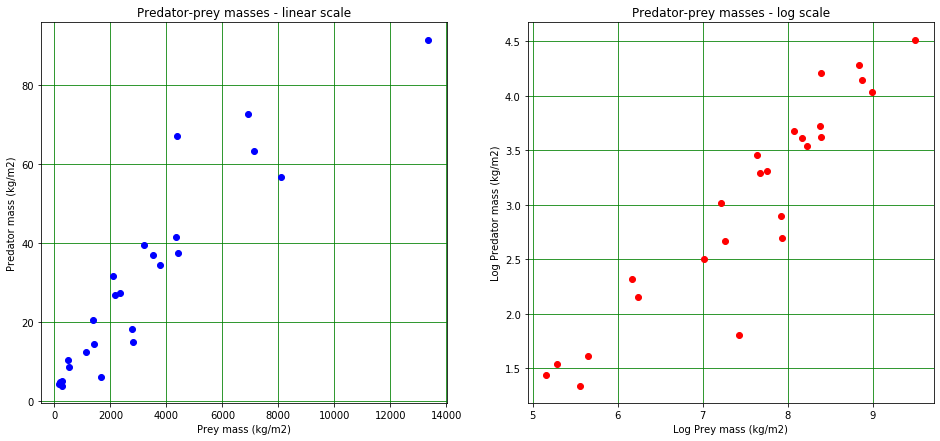

 
Date and time 2020-04-29 16:25:39.639893
Time since last check is 0:00:00.978189


In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)
plt.title("Predator-prey masses - linear scale")
plt.plot(preyArray, predArray, linestyle = '', marker = 'o', color = 'b',)
plt.xlabel("Prey mass (kg/m2)")
plt.ylabel("Predator mass (kg/m2)")
plt.grid(color = 'g')
#
plt.subplot(1, 2, 2)
plt.title("Predator-prey masses - log scale")
plt.xlabel("Log Prey mass (kg/m2)")
plt.ylabel("Log Predator mass (kg/m2)")
plt.plot(np.log(preyArray), np.log(predArray), linestyle = '', marker = 'o', color = 'r',)
plt.grid(color = 'g')
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Fit data without error treatment

Date and time  2020-04-29 16:25:39.715086
 
Number of points 25
 
xData			 yData
 8.87 +-  0.10		  4.15 +-  0.10
 5.29 +-  0.10		  1.54 +-  0.10
 6.17 +-  0.10		  2.32 +-  0.10
 8.39 +-  0.10		  3.63 +-  0.10
 6.24 +-  0.10		  2.15 +-  0.10
 5.55 +-  0.10		  1.34 +-  0.10
 7.94 +-  0.10		  2.69 +-  0.10
 7.26 +-  0.10		  2.67 +-  0.10
 7.22 +-  0.10		  3.01 +-  0.10
 9.00 +-  0.10		  4.04 +-  0.10
 8.39 +-  0.10		  4.21 +-  0.10
 5.66 +-  0.10		  1.62 +-  0.10
 8.07 +-  0.10		  3.67 +-  0.10
 9.50 +-  0.10		  4.52 +-  0.10
 8.16 +-  0.10		  3.61 +-  0.10
 7.43 +-  0.10		  1.81 +-  0.10
 7.76 +-  0.10		  3.31 +-  0.10
 7.92 +-  0.10		  2.89 +-  0.10
 8.84 +-  0.10		  4.29 +-  0.10
 8.38 +-  0.10		  3.72 +-  0.10
 7.64 +-  0.10		  3.45 +-  0.10
 7.68 +-  0.10		  3.29 +-  0.10
 7.02 +-  0.10		  2.50 +-  0.10
 5.16 +-  0.10		  1.44 +-  0.10
 8.23 +-  0.10		  3.54 +-  0.10
 
Fit quality:
chisq per point = 
 [2.317e-01 4.404e+00 7.739e+00 4.134e-01 1.134e+00 1.118e+00 2.677e+01
 1.411e+00 3.

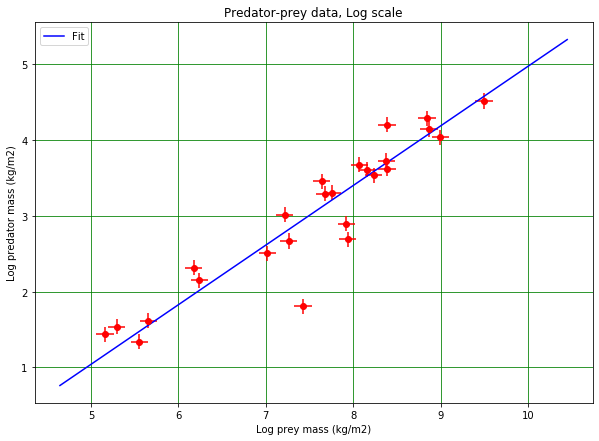

 
Date and time 2020-04-29 16:25:40.508673
Time since last check is 0:00:00.793587


In [5]:
import datetime
import math
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
nPoints = len(predArray)
print(" ")
print("Number of points",nPoints)
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Transfer predator and prey data to fit arrays
xData = np.log(preyArray)
yData = np.log(predArray)
#
# Add error guesses for predator and prey masses
errPredArray = 0.1*np.ones(nPoints)
errPreyArray = 0.1*np.ones(nPoints)
errLogPredArray = 0.1*np.ones(nPoints)
errLogPreyArray = 0.1*np.ones(nPoints)
#
xError = errLogPreyArray
yError = errLogPredArray
print(" ")
print("xData\t\t\t yData")
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
    # Plot data
    fig = plt.figure(figsize = (10, 7))
    plt.title('Predator-prey data, Log scale')
    plt.xlabel("Log prey mass (kg/m2)")
    plt.ylabel("Log predator mass (kg/m2)")
    
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '')
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "Fit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
    plt.grid(color = 'g')
    plt.legend()
    plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Perform error analysis for multiple species

Now calculate reasonable errors for predator biomass density. 

For a given species $i$ (e.g. lions), the biomass per unit area, $b_i$, is given by:

$$b_i = \frac{n_i m_i}{A}.$$

The biomass per unit area for all predator species is: 

\begin{align}
B &= b_1 + b_2 + \dots \\
  &= \frac{n_1 m_1}{A} + \frac{n_2 m_2}{A} + \dots
\end{align}

This means the error on $B$ is:

\begin{align}
\Delta B &= \sqrt{ \left( \frac{\partial B}{\partial n_1} \Delta n_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_1} \Delta m_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial n_2} \Delta n_2 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_2} \Delta m_2 \right)^2 + \dots +
                   \left( \frac{\partial B}{\partial A} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{n_1 m_1 + n_2 m_2 +\dots}{A^2} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{B}{A} \Delta A \right)^2 } \\
         &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

## Calculate biomass density and its errors for predators

In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# There are six predator species (lions, spotted hyena, leopards, cheetah, brown hyena and wild dogs)
# Abundance data starts and finishes at: 
cPredBegLeft, cPredBegRight = 'F74', 'K74'
#
# Animal mass data cells
cPredMassLeft, cPredMassRight = 'F71', 'K71'
#
# Find beginning row and column indices and number of predator columns
nPredRowTop, nPredColLeft = cellInds(cPredBegLeft)
nPredRowTop, nPredColRight = cellInds(cPredBegRight)
nPredCols = nPredColRight - nPredColLeft + 1
print(" ")
print("nPredColRight",nPredColRight,"nPredColLeft",nPredColLeft,"nPredCols",nPredCols)
#
# Set row at which data for all prey and predators ends
botRow = 119
#
# Find number of rows
nPredRowBot = botRow + 1
nPredRows = nPredRowBot  - nPredRowTop
print(" ")
print("nPredRowBot",nPredRowBot,"nPredRowTop",nPredRowTop,"nPredCols",nPredRows)
#
# Locate predator mass data
nPredMassTop, nPredMassLeft = cellInds(cPredMassLeft)
nPredMassTop, nPredMassRight = cellInds(cPredMassRight)
nPredMassBot = nPredMassTop + 1
#
# Get predator abundances and store in lists
numPredList = []
massPredList = []
for pred in range(0, nPredCols):
    theseNumbers = colList(PPsheet, nPredColLeft + pred, nPredRowTop, nPredRowBot)
    numPredList.append(theseNumbers)
    thisMass = colList(PPsheet, nPredMassLeft + pred, nPredMassTop, nPredMassBot)
    massPredList.append(thisMass[0])
#
# Store this data in numpy arrays.
numPredArr = np.array(numPredList).astype(float)
numPredErr = np.sqrt(numPredArr)
massPredArr = np.array(massPredList).astype(float)
#
# Add error on individual mass (guess)
massErrFactor = 0.2
massPredErr = massErrFactor*massPredArr
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("Predator array")
print("Index\t mass\t first",nPrintArr,"numbers")
for pred in range(0, nPredCols):
    print(f"{pred:d}\t {massPredArr[pred]:.1f}\t {numPredArr[pred, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:40.528676
 
nPredColRight 11 nPredColLeft 6 nPredCols 6
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
Predator array
Index	 mass	 first 5 numbers
0	 126.0	 [ 35. 210. 200. 130. 100.]
1	 50.0	 [ 390. 2200.  814.  700.  350.]
2	 37.0	 [  nan 1000.  210.   nan   77.]
3	 43.0	 [ 17. 980.  45.  nan  96.]
4	 41.0	 [  nan 2100.   nan   nan   nan]
5	 20.0	 [  nan 2200.   nan   nan    8.]
 
Date and time 2020-04-29 16:25:40.537568
Time since last check is 0:00:00.008892


In [7]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# Set cell where area data starts
areaBeg = 'D74'
#
# Find beginning row and column indices
areaRowBeg, areaCol = cellInds(areaBeg)
areaRowEnd = botRow + 1
areaList = colList(PPsheet, areaCol, areaRowBeg, areaRowEnd)
print("areaList",areaList)
#
# Turn the lists into numpy arrays to make them easier to manipulate 
areaArr = np.array(areaList).astype(float)
#
# Identify array elements which contain the value NaN
print(" ")
print("Area \n",areaArr)
areaErr = 0.2*areaArr
print ("Error on area \n",areaErr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:40.553904
areaList [390, 74000, 16280, 5053, 960, 960, 14540, 14651, 9590, 4471, 1442, 18989, 18989, 18989, 18989, 18989, 84, 110, 1670, 1500, 3245, 3245, 122, 120, 117, 260, 260, 260, 260, 260, 81, 1, 500, 1978, 17, 300, 300, 43626, 25000, 25000, 25000, 25000, 25000, 1683, 1683, 2850]
 
Area 
 [  390. 74000. 16280.  5053.   960.   960. 14540. 14651.  9590.  4471.
  1442. 18989. 18989. 18989. 18989. 18989.    84.   110.  1670.  1500.
  3245.  3245.   122.   120.   117.   260.   260.   260.   260.   260.
    81.     1.   500.  1978.    17.   300.   300. 43626. 25000. 25000.
 25000. 25000. 25000.  1683.  1683.  2850.]
Error on area 
 [   78.  14800.   3256.   1010.6   192.    192.   2908.   2930.2  1918.
   894.2   288.4  3797.8  3797.8  3797.8  3797.8  3797.8    16.8    22.
   334.    300.    649.    649.     24.4    24.     23.4    52.     52.
    52.     52.     52.     16.2     0.2   100.    395.6     3.4    60.
    60.   8725.2  5000.   5000.   5000. 

Combine the above to get the biomass density for predators. 

The formulae are repeated here for convenience!

\begin{align}
B &= \frac{1}{A} \left( n_1 m_1 + n_2 m_2 + \dots \right) \\
\Delta B &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

In [8]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Cope with undefined entries. 
numPredArrC = np.nan_to_num(numPredArr, nan = 0.0)
numPredErrC = np.nan_to_num(numPredErr, nan = 0.0)
massPredArrC = np.nan_to_num(massPredArr, nan = 0.0)
massPredErrC = np.nan_to_num(massPredErr, nan = 0.0)
areaArrC = np.nan_to_num(areaArr, nan = 1.0)
areaErrC = np.nan_to_num(areaErr, nan = 1.0)
#
predBarr = np.zeros(nPredRows)
predBerr = np.zeros(nPredRows)
#
for r in range(0, nPredRows):
    predBarr[r] = np.sum(numPredArrC[0:nPredCols, r]*massPredArrC[0:nPredCols])/areaArrC[r]
    predBerr[r] = np.sqrt(np.sum((massPredArrC[0:nPredCols]*numPredErrC[0:nPredCols, r])**2) + 
                          np.sum((numPredArrC[0:nPredCols, r]*massPredErrC[0:nPredCols])**2) +
                                 (predBarr[r]*areaErrC[r])**2)/areaArr[r]
#
print("predBarr",predBarr)
print("predBerr",predBerr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:40.583697
predBarr [ 63.18   4.67   4.64  10.17  38.79  36.28   7.48   9.72   3.83  14.76
  14.43  17.55  21.27  20.08  21.78  21.23  62.86  50.29  62.87  71.33
   4.65   5.43  40.2   48.42  29.55  78.79 111.35  93.58  64.25 109.67
  36.94   6.08  27.29  18.07  72.66  41.42  41.42  31.64  20.25  22.31
  24.43  33.75  33.52  12.24   4.21  34.39]
predBerr [16.59  1.03  1.11  2.57  9.19  8.57  1.78  2.31  0.9   3.61  3.88  4.14
  5.06  4.82  5.24  5.09 18.83 15.03 15.62 17.74  1.2   1.41 11.2  13.37
  9.28 20.57 27.73 23.3  16.13 27.95 10.35 24.91  6.77  4.65 24.36 10.74
 10.74  7.72  4.88  5.32  5.82  8.16  8.07  2.97  1.06  8.36]
 
Date and time 2020-04-29 16:25:40.592086
Time since last check is 0:00:00.008389


## Calculate biomass density and its errors for prey

In [9]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa. The 33 prey species are:
# Elephant, White Rhino, Hippo, Black Rhino, Giraffe, Buffalo, Eland, Zebra, Roan, Sable, Waterbuck, Wildebeest, Kudu, Oryx, Kongoni, 
# Topi/Tsessebe, Nyala, Bushpig, Warthog, Grant's Gazelle, Impala, Reedbuck, Bushbuck, Springbok, Thomson's Gazelle, Duiker, Baboon, 
# Oribi, Klipspringer, Steenbok, Grysbok, Dik-dik and Other.
#
# Note that Elephant, White Rhino, Hippo, Black Rhino and Giraffe are omitted from the calculation (too large to be preyed upan?).
#
# Abundance data starts and finishes at: 
cPreyBegLeft, cPreyBegRight = 'Q74', 'AR74'
#
# Animal mass data cells
cPreyMassLeft, cPreyMassRight = 'Q71', 'AR71'
#
# Find beginning row and column indices and number of predator columns
nPreyRowTop, nPreyColLeft = cellInds(cPreyBegLeft)
nPreyRowTop, nPreyColRight = cellInds(cPreyBegRight)
nPreyCols = nPreyColRight - nPreyColLeft + 1
print(" ")
print("nPreyColRight",nPreyColRight,"nPreyColLeft",nPreyColLeft,"nPreyCols",nPreyCols)
#
# Set row at which data for all prey and predators ends
botRow = 119
#
# Find number of rows
nPreyRowBot = botRow + 1
nPreyRows = nPreyRowBot  - nPreyRowTop
print(" ")
print("nPredRowBot",nPredRowBot,"nPredRowTop",nPredRowTop,"nPredCols",nPredRows)
#
# Locate predator mass data
nPreyMassTop, nPreyMassLeft = cellInds(cPreyMassLeft)
nPreyMassTop, nPreyMassRight = cellInds(cPreyMassRight)
nPreyMassBot = nPreyMassTop + 1
#
# Get predator abundances and store in lists
numPreyList = []
massPreyList = []
for prey in range(0, nPreyCols):
    theseNumbers = colList(PPsheet, nPreyColLeft + prey, nPreyRowTop, nPreyRowBot)
    numPreyList.append(theseNumbers)
    thisMass = colList(PPsheet, nPreyMassLeft + prey, nPreyMassTop, nPreyMassBot)
    massPreyList.append(thisMass[0])
#
# Store this data in numpy arrays.
numPreyArr = np.array(numPreyList).astype(float)
numPreyErr = np.sqrt(numPreyArr)
massPreyArr = np.array(massPreyList).astype(float)
#
# Add error on individual mass (guess)
massErrFactor = 0.1
massPreyErr = massErrFactor*massPreyArr
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("Prey array")
print("Index\t mass\t first",nPrintArr,"numbers")
for prey in range(0, nPreyCols):
    print(f"{prey:d}\t {massPreyArr[prey]:.1f}\t {numPreyArr[prey, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:40.620875
 
nPreyColRight 44 nPreyColLeft 17 nPreyCols 28
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
Prey array
Index	 mass	 first 5 numbers
0	 520.0	 [ 560.    5.   nan 2274. 1903.]
1	 380.0	 [ 137.2 1100.   493.   317.     nan]
2	 220.0	 [ 4059.9 21200.   9388.   1385.   1786. ]
3	 260.0	 [ nan 250.  29.  nan  nan]
4	 220.0	 [nan nan nan nan nan]
5	 180.0	 [ 35.1   nan   nan 360.  408. ]
6	 163.0	 [ 8307. 17500.  3478.   364.  1624.]
7	 170.0	 [ 220. 7350.  701. 2285. 1642.]
8	 162.0	 [  84. 7200. 3629.   nan   nan]
9	 125.0	 [ 102. 2100.  860.   nan   nan]
10	 108.0	 [nan nan nan nan nan]
11	 58.0	 [  nan   nan   nan  370. 9532.]
12	 70.0	 [ nan 200.  nan  nan 346.]
13	 55.0	 [  42.9  550.    70.   267.  4540. ]
14	 45.0	 [2054.   nan   nan   nan   nan]
15	 44.0	 [   85.8   400.     82.   6005.  10984. ]
16	 40.0	 [ 51.   5.  nan  nan 165.]
17	 35.0	 [ nan  nan  nan  nan 479.]
18	 32.0	 [   nan 21000.  7569.    nan    nan]
19	 18.0	 [396.  nan  n

In [10]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Cope with undefined entries. 
numPreyArrC = np.nan_to_num(numPreyArr, nan = 0.0)
numPreyErrC = np.nan_to_num(numPreyErr, nan = 0.0)
massPreyArrC = np.nan_to_num(massPreyArr, nan = 0.0)
massPreyErrC = np.nan_to_num(massPreyErr, nan = 0.0)
areaArrC = np.nan_to_num(areaArr, nan = 1.0)
areaErrC = np.nan_to_num(areaErr, nan = 1.0)
#
preyBarr = np.zeros(nPreyRows)
preyBerr = np.zeros(nPreyRows)
#
for r in range(0, nPreyRows):
    preyBarr[r] = np.sum(numPreyArrC[0:nPreyCols, r]*massPreyArrC[0:nPreyCols])/areaArrC[r]
    preyBerr[r] = np.sqrt(np.sum((massPreyArrC[0:nPreyCols]*numPreyErrC[0:nPreyCols, r])**2) + 
                          np.sum((numPreyArrC[0:nPreyCols, r]*massPreyErrC[0:nPreyCols])**2) +
                                 (preyBarr[r]*areaErrC[r])**2)/areaArr[r]
#
print("preyBarr",preyBarr)
print("preyBerr",preyBerr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-29 16:25:40.673791
preyBarr [ 7103.13   158.44   239.1    479.7   3500.45  5295.54   608.34   416.38
   257.89  2795.73  1423.63  1197.62  1428.99  1618.76  1205.7   1356.16
 10170.58  5983.36  4854.53  3928.64   262.36   303.91  3217.18  3601.
  2628.97 12945.83 15247.   13038.43 12307.81 13225.01  3497.3   1503.95
  2336.26  2414.02  6836.72   212.23  2018.02  2079.28  2020.12  2885.15
  2200.28  2000.5   1684.62  1116.33   174.27  3763.28]
preyBerr [1483.77   32.65   49.8    99.58  715.17 1093.78  127.24   85.46   55.32
  576.2   316.42  246.83  296.05  334.36  250.11  282.84 2262.09 1253.67
 1023.14  804.95   54.59   62.73  664.13  749.36  546.24 2743.09 3196.64
 2708.4  2564.91 2750.59  758.45  709.73  480.28  528.94 1505.44   44.87
  425.72  447.8   424.41  599.85  451.98  410.74  345.05  230.74   36.28
  804.16]
 
Date and time 2020-04-29 16:25:40.680558
Time since last check is 0:00:00.006767


## Fit data using errors for both predators and prey

Date and time  2020-04-29 16:25:40.751314
 
Number of points 46
 
preyBarr
 [ 7103.13   158.44   239.1    479.7   3500.45  5295.54   608.34   416.38
   257.89  2795.73  1423.63  1197.62  1428.99  1618.76  1205.7   1356.16
 10170.58  5983.36  4854.53  3928.64   262.36   303.91  3217.18  3601.
  2628.97 12945.83 15247.   13038.43 12307.81 13225.01  3497.3   1503.95
  2336.26  2414.02  6836.72   212.23  2018.02  2079.28  2020.12  2885.15
  2200.28  2000.5   1684.62  1116.33   174.27  3763.28]
 
predBarr
 [ 63.18   4.67   4.64  10.17  38.79  36.28   7.48   9.72   3.83  14.76
  14.43  17.55  21.27  20.08  21.78  21.23  62.86  50.29  62.87  71.33
   4.65   5.43  40.2   48.42  29.55  78.79 111.35  93.58  64.25 109.67
  36.94   6.08  27.29  18.07  72.66  41.42  41.42  31.64  20.25  22.31
  24.43  33.75  33.52  12.24   4.21  34.39]
 
xData			 yData
 8.87 +-  0.21		  4.15 +-  0.26
 5.07 +-  0.21		  1.54 +-  0.22
 5.48 +-  0.21		  1.54 +-  0.24
 6.17 +-  0.21		  2.32 +-  0.25
 8.16 +-  0.20		  3.

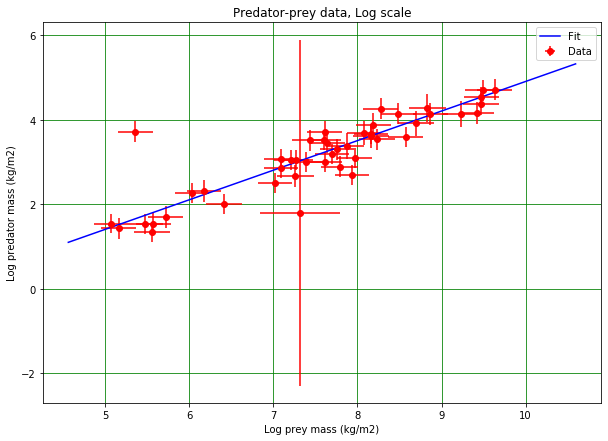

 
Date and time 2020-04-29 16:25:41.085969
Time since last check is 0:00:00.334655
5.065388467814063


In [11]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
import sys
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
if nPredRows != nPreyRows:
    print(" ")
    print("Mismatch in number of locations for predators",nPredCols,"and prey",nPreyCols,"stop fit!")
    sys.exit()
#
nPoints = nPredRows
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
print(" ")
print("Number of points",nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Transfer predator and prey data to fit arrays
print(" ")
print("preyBarr\n",preyBarr)
print(" ")
print("predBarr\n",predBarr)
xData = np.log(preyBarr)
yData = np.log(predBarr)
#
# Add error guesses for predator and prey masses
xError = 1/preyBarr*preyBerr
yError = 1/predBarr*predBerr
print(" ")
print("xData\t\t\t yData")
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
    # Plot data
    fig = plt.figure(figsize = (10, 7))
    plt.title('Predator-prey data, Log scale')
    plt.xlabel("Log prey mass (kg/m2)")
    plt.ylabel("Log predator mass (kg/m2)")
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '', label = "Data")
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "Fit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
    plt.grid(color = 'g')
    plt.legend()
    plt.show()
#    
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

print (xData[1])

# Calculating averages


In [12]:
#Calculating weighted average in X for each ecosystem
SQRerrX= xError*xError
SQRerrY= yError*yError

AmboseliX = xData[0]
EtoshaX = ((xData[1]/(SQRerrX[1]))+(xData[2]/(SQRerrX[2])))/((1/(SQRerrX[1]))+(1/(SQRerrX[2])))
GonarezhouX = xData[3]
HluhluweX = ((xData[4]/(SQRerrX[4]))+(xData[5]/(SQRerrX[5])))/((1/(SQRerrX[4]))+(1/(SQRerrX[5])))
HwangeX = ((xData[6]/(SQRerrX[6]))+(xData[7]/(SQRerrX[7])))/((1/(SQRerrX[6]))+(1/(SQRerrX[7])))
KalahariX = xData[8]
KataviX = xData[9]
KidepoX = xData[10]
KrugerX = ((xData[11]/(SQRerrX[11]))+(xData[12]/(SQRerrX[12]))+(xData[13]/(SQRerrX[13]))+(xData[14]/(SQRerrX[14]))+(xData[15]/(SQRerrX[15])))/((1/(SQRerrX[11]))+(1/(SQRerrX[12]))+(1/(SQRerrX[13]))+(1/(SQRerrX[14]))+(1/(SQRerrX[15])))
LakeManyaraX = ((xData[16]/(SQRerrX[16]))+(xData[17]/(SQRerrX[17])))/((1/(SQRerrX[16]))+(1/(SQRerrX[17])))
MasaiMaraX = ((xData[18]/(SQRerrX[18]))+(xData[19]/(SQRerrX[19])))/((1/(SQRerrX[18]))+(1/(SQRerrX[19])))
MkomaziX = ((xData[20]/(SQRerrX[20]))+(xData[21]/(SQRerrX[21])))/((1/(SQRerrX[20]))+(1/(SQRerrX[21])))
NarobiX = ((xData[22]/(SQRerrX[22]))+(xData[23]/(SQRerrX[23]))+(xData[24]/(SQRerrX[24])))/((1/(SQRerrX[22]))+(1/(SQRerrX[23]))+(1/(SQRerrX[24])))
NgorongoroX = ((xData[25]/(SQRerrX[25]))+(xData[26]/(SQRerrX[26]))+(xData[27]/(SQRerrX[27]))+(xData[28]/(SQRerrX[28]))+(xData[29]/(SQRerrX[29])))/((1/(SQRerrX[25]))+(1/(SQRerrX[26]))+(1/(SQRerrX[27]))+(1/(SQRerrX[28]))+(1/(SQRerrX[29])))
NwaswitshakaX = xData[30]
OkavangoX = xData[31]
PilanesburgX = xData[32]
QueenElizabethX = xData[33]
SableRiverX = xData[34]
SavutiX = ((xData[35]/(SQRerrX[35]))+(xData[36]/(SQRerrX[36])))/((1/(SQRerrX[35]))+(1/(SQRerrX[36])))
SelousX = xData[37]
SerengetiX = ((xData[38]/(SQRerrX[38]))+(xData[39]/(SQRerrX[39]))+(xData[40]/(SQRerrX[40]))+(xData[41]/(SQRerrX[41]))+(xData[42]/(SQRerrX[42])))/((1/(SQRerrX[38]))+(1/(SQRerrX[39]))+(1/(SQRerrX[40]))+(1/(SQRerrX[41]))+(1/(SQRerrX[42])))
TaranguireX =((xData[43]/(SQRerrX[43]))+(xData[44]/(SQRerrX[44]))+(xData[45]/(SQRerrX[45])))/((1/(SQRerrX[43]))+(1/(SQRerrX[44]))+(1/(SQRerrX[45])))

#Kruger = sum(xData[11:15]*xError[11:15])/sum(xError[11:15])
#SOE1= (xError[11]+xError[12]+xError[13]+xError[14]+xError[15])
#SOE2= sum(range(xError[11],xError[15])) I understand why this doesn't work, because its calling the value, not the inde
#SOE3= sum(xError[11:15])
#print (SOE1,  SOE3) #These are different?



AVxData= [AmboseliX,EtoshaX,GonarezhouX,HluhluweX,HwangeX,KalahariX,KataviX,KidepoX,KrugerX,LakeManyaraX,MasaiMaraX,MkomaziX,NarobiX,NgorongoroX,NwaswitshakaX,OkavangoX,PilanesburgX,QueenElizabethX,SableRiverX,SavutiX,SelousX,SerengetiX,TaranguireX]
print(AVxData)
print("Length is",len(AVxData))

#Calculating weighted average in Y for each ecosystem
AmboseliY = yData[0]
EtoshaY = ((yData[1]/(SQRerrY[1]))+(yData[2]/(SQRerrY[2])))/((1/(SQRerrY[1]))+(1/(SQRerrY[2])))
GonarezhouY = yData[3]
HluhluweY = ((yData[4]/(SQRerrY[4]))+(yData[5]/(SQRerrY[5])))/((1/(SQRerrY[4]))+(1/(SQRerrY[5])))
HwangeY = ((yData[6]/(SQRerrY[6]))+(yData[7]/(SQRerrY[7])))/((1/(SQRerrY[6]))+(1/(SQRerrY[7])))
KalahariY = yData[8]
KataviY = yData[9]
KidepoY = yData[10]
KrugerY = ((yData[11]/(SQRerrY[11]))+(yData[12]/(SQRerrY[12]))+(yData[13]/(SQRerrY[13]))+(yData[14]/(SQRerrY[14]))+(yData[15]/(SQRerrY[15])))/((1/(SQRerrY[11]))+(1/(SQRerrY[12]))+(1/(SQRerrY[13]))+(1/(SQRerrY[14]))+(1/(SQRerrY[15])))
LakeManyaraY = ((yData[16]/(SQRerrY[16]))+(yData[17]/(SQRerrY[17])))/((1/(SQRerrY[16]))+(1/(SQRerrY[17])))
MasaiMaraY = ((yData[18]/(SQRerrY[18]))+(yData[19]/(SQRerrY[19])))/((1/(SQRerrY[18]))+(1/(SQRerrY[19])))
MkomaziY = ((yData[20]/(SQRerrY[20]))+(yData[21]/(SQRerrY[21])))/((1/(SQRerrY[20]))+(1/(SQRerrY[21])))
NarobiY = ((yData[22]/(SQRerrY[22]))+(yData[23]/(SQRerrY[23]))+(yData[24]/(SQRerrY[24])))/((1/(SQRerrY[22]))+(1/(SQRerrY[23]))+(1/(SQRerrY[24])))
NgorongoroY = ((yData[25]/(SQRerrY[25]))+(yData[26]/(SQRerrY[26]))+(yData[27]/(SQRerrY[27]))+(yData[28]/(SQRerrY[28]))+(yData[29]/(SQRerrY[29])))/((1/(SQRerrY[25]))+(1/(SQRerrY[26]))+(1/(SQRerrY[27]))+(1/(SQRerrY[28]))+(1/(SQRerrY[29])))
NwaswitshakaY = yData[30]
OkavangoY = yData[31]
PilanesburgY = yData[32]
QueenElizabethY = yData[33]
SableRiverY = yData[34]
SavutiY = ((yData[35]/(SQRerrY[35]))+(yData[36]/(SQRerrY[36])))/((1/(SQRerrY[35]))+(1/(SQRerrY[36])))
SelousY = yData[37]
SerengetiY = ((yData[38]/(SQRerrY[38]))+(yData[39]/(SQRerrY[39]))+(yData[40]/(SQRerrY[40]))+(yData[41]/(SQRerrY[41]))+(yData[42]/(SQRerrY[42])))/((1/(SQRerrY[38]))+(1/(SQRerrY[39]))+(1/(SQRerrY[40]))+(1/(SQRerrY[41]))+(1/(SQRerrY[42])))
TaranguireY =((yData[43]/(SQRerrY[43]))+(yData[44]/(SQRerrY[44]))+(yData[45]/(SQRerrY[45])))/((1/(SQRerrY[43]))+(1/(SQRerrY[44]))+(1/(SQRerrY[45])))


AVyData= [AmboseliY,EtoshaY,GonarezhouY,HluhluweY,HwangeY,KalahariY,KataviY,KidepoY,KrugerY,LakeManyaraY,MasaiMaraY,MkomaziX,NarobiY,NgorongoroY,NwaswitshakaY,OkavangoY,PilanesburgY,QueenElizabethY,SableRiverY,SavutiY,SelousY,SerengetiY,TaranguireY]
print(AVyData)
print("Length is",len(AVyData))


[8.868291460723704, 5.268905407678368, 6.173168210690201, 8.365378495640003, 6.2175762641002, 5.552515912279969, 7.935848703371222, 7.2609620799371175, 7.209909106489731, 8.946179774588158, 8.378871499261725, 5.643820006651703, 8.046508126903, 9.496662126736785, 8.159745462183366, 7.315852625362816, 7.756308351261181, 7.78905003533682, 8.830063019278192, 6.486157691522888, 7.63977815745939, 7.659690516916273, 6.780353075389427]
Length is 23
[4.146020262115823, 1.5387928868349505, 2.319266865371966, 3.6246165941415844, 2.143742578719284, 1.3418106044833609, 2.69217899911427, 2.6694987045653, 3.010797347898518, 4.029091606816305, 4.204165625406679, 5.643820006651703, 3.6749374649942594, 4.49730600692474, 3.609165651089327, 1.805785640961147, 3.306520334720247, 2.8944640359394964, 4.285723382211894, 3.7237638559674378, 3.454471666182803, 3.2669873628457156, 2.5165993304514385]
Length is 23


# Error on weighted mean

In [13]:
#Calculating the error on the weighted mean X
AmboseliXerr = xError[0]
EtoshaXerr = math.sqrt(1/((1/(SQRerrX[1]))+(1/(SQRerrX[2]))))
GonarezhouXerr = xError[3]
HluhluweXerr = math.sqrt(1/((1/(SQRerrX[4]))+(1/(SQRerrX[5]))))
HwangeXerr = math.sqrt(1/((1/(SQRerrX[6]))+(1/(SQRerrX[7]))))
KalahariXerr = xError[8]
KataviXerr = xError[9]
KidepoXerr = xError[10]
KrugerXerr = math.sqrt(1/((1/(SQRerrX[11]))+(1/(SQRerrX[12]))+(1/(SQRerrX[13]))+(1/(SQRerrX[14]))+(1/(SQRerrX[15]))))
LakeManyaraXerr = math.sqrt(1/((1/(SQRerrX[16]))+(1/(SQRerrX[17]))))
MasaiMaraXerr = math.sqrt(1/((1/(SQRerrX[18]))+(1/(SQRerrX[19]))))
MkomaziXerr = math.sqrt(1/((1/(SQRerrX[20]))+(1/(SQRerrX[21]))))
NarobiXerr = math.sqrt(1/((1/(SQRerrX[22]))+(1/(SQRerrX[23]))+(1/(SQRerrX[24]))))
NgorongoroXerr = math.sqrt(1/((1/(SQRerrX[25]))+(1/(SQRerrX[26]))+(1/(SQRerrX[27]))+(1/(SQRerrX[28]))+(1/(SQRerrX[29]))))
NwaswitshakaXerr = xError[30]
OkavangoXerr = xError[31]
PilanesburgXerr = xError[32]
QueenElizabethXerr = xError[33]
SableRiverXerr = xError[34]
SavutiXerr = math.sqrt(1/((1/(SQRerrX[35]))+(1/(SQRerrX[36]))))
SelousXerr = xError[37]
SerengetiXerr = math.sqrt(1/((1/(SQRerrX[38]))+(1/(SQRerrX[39]))+(1/(SQRerrX[40]))+(1/(SQRerrX[41]))+(1/(SQRerrX[42]))))
TaranguireXerr=math.sqrt(1/((1/(SQRerrX[43]))+(1/(SQRerrX[44]))+(1/(SQRerrX[45]))))

AVxError= [AmboseliXerr,EtoshaXerr,GonarezhouXerr,HluhluweXerr,HwangeXerr,KalahariXerr,KataviXerr,KidepoXerr,KrugerXerr,LakeManyaraXerr,MasaiMaraXerr,MkomaziXerr,NarobiXerr,NgorongoroXerr,NwaswitshakaXerr,OkavangoXerr,PilanesburgXerr,QueenElizabethXerr,SableRiverXerr,SavutiXerr,SelousXerr,SerengetiXerr,TaranguireXerr]
print(AVxError)
print("Length is",len(AVxError))

#Calculating the error on the weighted mean Y
AmboseliYerr = yError[0]
EtoshaYerr = math.sqrt(1/((1/(SQRerrY[1]))+(1/(SQRerrY[2]))))
GonarezhouYerr = yError[3]
HluhluweYerr = math.sqrt(1/((1/(SQRerrY[4]))+(1/(SQRerrY[5]))))
HwangeYerr = math.sqrt(1/((1/(SQRerrY[6]))+(1/(SQRerrY[7]))))
KalahariYerr = yError[8]
KataviYerr = yError[9]
KidepoYerr = yError[10]
KrugerYerr = math.sqrt(1/((1/(SQRerrY[11]))+(1/(SQRerrY[12]))+(1/(SQRerrY[13]))+(1/(SQRerrY[14]))+(1/(SQRerrY[15]))))
LakeManyaraYerr = math.sqrt(1/((1/(SQRerrY[16]))+(1/(SQRerrY[17]))))
MasaiMaraYerr = math.sqrt(1/((1/(SQRerrY[18]))+(1/(SQRerrY[19]))))
MkomaziYerr = math.sqrt(1/((1/(SQRerrY[20]))+(1/(SQRerrY[21]))))
NarobiYerr = math.sqrt(1/((1/(SQRerrY[22]))+(1/(SQRerrY[23]))+(1/(SQRerrY[24]))))
NgorongoroYerr = math.sqrt(1/((1/(SQRerrY[25]))+(1/(SQRerrY[26]))+(1/(SQRerrY[27]))+(1/(SQRerrY[28]))+(1/(SQRerrY[29]))))
NwaswitshakaYerr = yError[30]
OkavangoYerr = yError[31]
PilanesburgYerr = yError[32]
QueenElizabethYerr = yError[33]
SableRiverYerr = yError[34]
SavutiYerr = math.sqrt(1/((1/(SQRerrY[35]))+(1/(SQRerrY[36]))))
SelousYerr = yError[37]
SerengetiYerr = math.sqrt(1/((1/(SQRerrY[38]))+(1/(SQRerrY[39]))+(1/(SQRerrY[40]))+(1/(SQRerrY[41]))+(1/(SQRerrY[42]))))
TaranguireYerr=math.sqrt(1/((1/(SQRerrY[43]))+(1/(SQRerrY[44]))+(1/(SQRerrY[45]))))

AVyError= [AmboseliYerr,EtoshaYerr,GonarezhouYerr,HluhluweYerr,HwangeYerr,KalahariYerr,KataviYerr,KidepoYerr,KrugerYerr,LakeManyaraYerr,MasaiMaraYerr,MkomaziYerr,NarobiYerr,NgorongoroYerr,NwaswitshakaYerr,OkavangoYerr,PilanesburgYerr,QueenElizabethYerr,SableRiverYerr,SavutiYerr,SelousYerr,SerengetiYerr,TaranguireYerr]
print(AVyError)
print("Length is",len(AVyError))


[0.20888995632039578, 0.14648486434300492, 0.2075897932356835, 0.1452533149690684, 0.1464919297793881, 0.214513954086657, 0.20609978190446931, 0.22226053558918232, 0.09264506117707026, 0.15251020922588387, 0.14691122333680026, 0.14654054650760284, 0.11976077935506897, 0.09351850901324107, 0.21686881064607424, 0.47191265767410334, 0.20557722437277112, 0.21911081255474324, 0.22019916676887208, 0.14932709316127094, 0.21536299380877721, 0.09243207690887598, 0.12093018275297131]
Length is 23
[0.26256313191251585, 0.1622686438350791, 0.25312318627918445, 0.16723810545048776, 0.16828507637307535, 0.23582634062810812, 0.2442738386037529, 0.2686548972545491, 0.10685761456785174, 0.2116307275610949, 0.17575498576400708, 0.18320908585264137, 0.16634848555810985, 0.11308817157675465, 0.28011617286804463, 4.094452386116212, 0.24822484780537155, 0.25740178706518596, 0.3353028454841237, 0.18331703720255038, 0.2439500635391677, 0.1073573964222266, 0.1417484950360156]
Length is 23


In [27]:
#Calculating the error on the weighted mean
AmboseliYerr = yError[0]
EtoshaYerr = math.sqrt(1/((1/(SQRerrY[1]))+(1/(SQRerrY[2]))))
GonarezhouYerr = yError[3]
HluhluweYerr = math.sqrt(1/((1/(SQRerrY[4]))+(1/(SQRerrY[5]))))
HwangeYerr = math.sqrt(1/((1/(SQRerrY[6]))+(1/(SQRerrY[7]))))
KalahariYerr = yError[8]
KataviYerr = yError[9]
KidepoYerr = yError[10]
KrugerYerr = math.sqrt(1/((1/(SQRerrY[11]))+(1/(SQRerrY[12]))+(1/(SQRerrY[13]))+(1/(SQRerrY[14]))+(1/(SQRerrY[15]))))
LakeManyaraYerr = math.sqrt(1/((1/(SQRerrY[16]))+(1/(SQRerrY[17]))))
MasaiMaraYerr = math.sqrt(1/((1/(SQRerrY[18]))+(1/(SQRerrY[19]))))
MkomaziYerr = math.sqrt(1/((1/(SQRerrY[20]))+(1/(SQRerrY[21]))))
NarobiYerr = math.sqrt(1/((1/(SQRerrY[22]))+(1/(SQRerrY[23]))+(1/(SQRerrY[24]))))
NgorongoroYerr = math.sqrt(1/((1/(SQRerrY[25]))+(1/(SQRerrY[26]))+(1/(SQRerrY[27]))+(1/(SQRerrY[28]))+(1/(SQRerrY[29]))))
NwaswitshakaYerr = yError[30]
OkavangoYerr = yError[31]
PilanesburgYerr = yError[32]
QueenElizabethYerr = yError[33]
SableRiverYerr = yError[34]
SavutiYerr = math.sqrt(1/((1/(SQRerrY[35]))+(1/(SQRerrY[36]))))
SelousYerr = yError[37]
SerengetiYerr = math.sqrt(1/((1/(SQRerrY[38]))+(1/(SQRerrY[39]))+(1/(SQRerrY[40]))+(1/(SQRerrY[41]))+(1/(SQRerrY[42]))))
TaranguireYerr=math.sqrt(1/((1/(SQRerrY[43]))+(1/(SQRerrY[44]))+(1/(SQRerrY[45]))))